<a href="https://colab.research.google.com/github/claudiaesnarrizaga/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Pr%C3%A1ctica_1_Dise%C3%B1o%2C_Entrenamiento_y_Test_de_un_Sistema_de_Redes_de_Neuronas_Artificiales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1 - Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas.
###Grupo B03
Integrantes: Celia Díaz, Jaime Martínez, Claudia Esnarrizaga


##**Enunciado**
Crea un modelo de Red de Neuronas Artificiales que sea capaz de **reconocer** y **clasificar imágenes de ropa** en sus diferentes **tipologías**. Este modelo será **definido**, **configurado**, **entrenado**, **evaluado** y **mejorado** para posteriormente usarlo para hacer **predicciones**.
Para ello, tendréis que crear un modelo en **Keras** aplicando de una tirada todos los pasos al conjunto de datos **Fashion-MNIST**, precargado en Keras y muy parecido al que vimos en clase de reconocimiento de cifras.
Fashion_MNIST es un conjunto de datos de las imágenes de los artículos de Zalando (www.zalando.com), una tienda de moda online alemana especializada en ventas de ropa y zapatos. El conjunto de datos contiene 70k imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles).
Se usan 60k imágenes para entrenar la red y 10k imágenes para evaluar la **precisión** con la que la red aprende a clasificar las imágenes.

##**Cuestiones a tener en cuenta**

1. Importar todas las librerías
requeridas
2. Asegurar que estamos ejecutando la versión 2.0.0 (o superior) de TensorFlow
3. Cargar datos de entrenamiento y de Test a partir de *keras.datasets.fashion_mnist*
4. Analizar si los datos tienen la forma esperada
5. Analizar el uso de la función de keras *keras.layers.Flatten()*




In [13]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x # Metasentencia: asegurarme de que estoy usando la versión por encima de la versión 2
import tensorflow as tf # tensorflow (librería): matrices, tensores
from tensorflow import keras # Usamos keras metido dentro de tensorflow
from keras.models import Sequential

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [14]:
# 2._ VERSIÓN TENSORFLOW >= 2.0.0
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__) # Vemos qué versión estamos utilizando

GPU Available: []
2.13.0


In [15]:
# 3._ CARGAMOS EL CONJUNTO DE DATOS FASHION-MINIST EN KERAS
from keras.datasets import fashion_mnist # De todos los conjuntos de datos impórtame mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Llama a una función, cargar datos

Para comprobar la forma de los datos, imprimiremos una de las imágenes, elegida de forma aleatoria, y dependiendo del número que nos devuelva, sabremos qué prenda es gracias a la siguiente tabla:

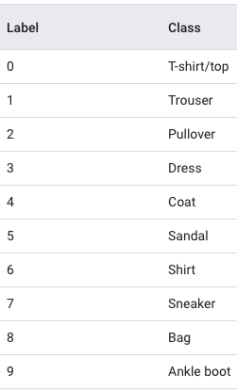

In [16]:
# 4._ COMPROBAR FORMA DE LOS DATOS
print(train_images.shape) # train_images: variable donde se me han guardado las imágenes (60000 imágenes/matrices de 28x28)
# Vemos la matriz de la imagen número 2500 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[2500]))

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0  13   4   0   0   0  30   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  67 189 228 255 172 124 255 235 201  94   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  52 246 244 227 217 233 235 229 233 239 255  99   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 180 246 226 232 229 223 228 235 234 230 244 216   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 217 242 229 233 235 235 236 236 233 231 241 240   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 244 242 239 233 233 233 232 234 234 239 239 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 227 230 215 250 233 233 233 236 246 220 227 239   7   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  14 249 178 120 255 227 240 241 227 255 108 148 255  49   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  62 255 136  65 255 231 219 215 23

In [17]:
train_labels[2500] # Cogemos la etiqueta asociada a la imagen 2500
# La imagen corresponde con un vestido.

3

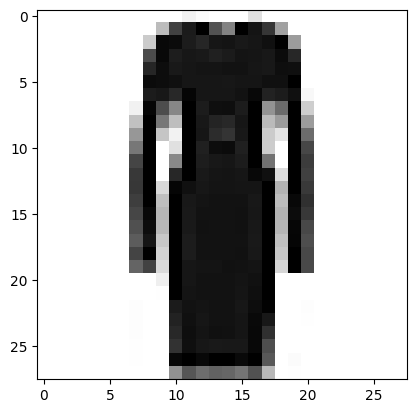

In [18]:
# Veamos el elemento 2500 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[2500]
plt.imshow(digit, cmap=plt.cm.binary) # imshow: muéstrame imagen, le paso una matriz y
                                      # el mapeo de colores es cm.binary (número más bajo = blanco, número más alto = negro)
plt.show()

La función `keras.layers.Flatten()` se utiliza para aplanar una capa de datos en una sola dimensión. En el contexto de un modelo de red neuronal, se utiliza para transformar datos bidimensionales (como imágenes) en una forma unidimensional antes de pasarlos a capas densamente conectadas. En nuestro código, podríamos aplicarlo de la siguiente manera:

In [19]:
# 5._ ANALIZAR FUNCIÓN keras.layers.Flatten()
from keras.layers import Flatten, Dense
# Añadimos una capa Flatten después de cargar los datos
model = keras.Sequential([Flatten(input_shape = (28, 28))])

Si agregamos una capa `Flatten` después de cargar los datos nos transformará las imágenes de 28x28 píxeles en un vector unidimensional de 784 elementos antes de pasarlos a las capas densas de la red neuronal. Esto es necesario porque las capas densas requieren entradas unidimensionales. No nos va a cambiar la forma en que cargamos o mostramos las imágenes, pero va a ser una parte esencial de la definición de nuestro modelo de red neuronal si planeamos usar capas densamente conectadas después de aplanar los datos.

##**Cuestiones para implementar y responder**

####**1._** Configurar y entrenar los siguientes modelos de red de neuronas, todos con función de pérdida `categorical_crossentropy`, métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados:
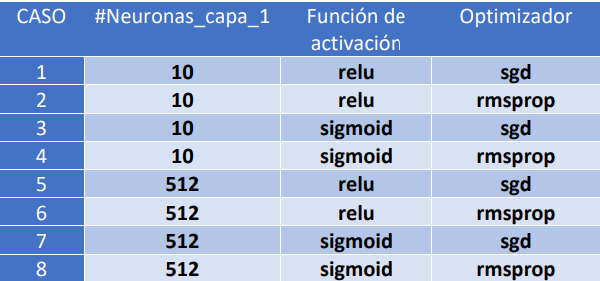

In [20]:
from keras import models
from keras import layers
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
network = models.Sequential()

Aprovechando que hemos investigado sobre la función `Flatten`, incluiremos una línea de código implementándola. La capa `Flatten` no utiliza función de activación, ya que su único propósito es transformar la entrada tridimensional en una entrada unidimensional. Su función es puramente estructural y no realiza ningún cambio ni cálculo de activación.

In [21]:
# network.add(layers.Flatten(input_shape=(28, 28)))

Preprocesamos las imágenes antes de alimentarlas a una red neuronal. Normalizar es importante para asegurarnos de que las características de entrada estén en un rango manejable, lo que nos puede ayudar a mejorar la convergencia y la velocidad de entrenamiento de la red.

In [22]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255

A continuación programaremos uno a uno los distintos casos:

**Modelo 1**

In [23]:
m1 = Sequential()
m1.add(Flatten(input_shape=(28, 28)))
m1.add(Dense(10, activation='relu'))
m1.add(Dense(10, activation='softmax'))

**Modelo 2**

In [24]:
m2 = Sequential()
m2.add(Flatten(input_shape=(28, 28)))
m2.add(Dense(10, activation='relu'))
m2.add(Dense(10, activation='softmax'))

**Modelo 3**

In [25]:
m3 = Sequential()
m3.add(Flatten(input_shape=(28, 28)))
m3.add(Dense(10, activation='sigmoid'))
m3.add(Dense(10, activation='softmax'))

**Modelo 4**

In [26]:
m4 = Sequential()
m4.add(Flatten(input_shape=(28, 28)))
m4.add(Dense(10, activation='sigmoid'))
m4.add(Dense(10, activation='softmax'))

**Modelo 5**

In [27]:
m5 = Sequential()
m5.add(Flatten(input_shape=(28, 28)))
m5.add(Dense(512, activation='relu'))
m5.add(Dense(10, activation='softmax'))

**Modelo 6**

In [28]:
m6 = Sequential()
m6.add(Flatten(input_shape=(28, 28)))
m6.add(Dense(512, activation='relu'))
m6.add(Dense(10, activation='softmax'))

**Modelo 7**

In [29]:
m7 = Sequential()
m7.add(Flatten(input_shape=(28, 28)))
m7.add(Dense(512, activation='sigmoid'))
m7.add(Dense(10, activation='softmax'))

**Modelo 8**

In [30]:
m8 = Sequential()
m8.add(Flatten(input_shape=(28, 28)))
m8.add(Dense(512, activation='sigmoid'))
m8.add(Dense(10, activation='softmax'))

Metemos cada uno de los modelos creados en una lista:

In [31]:
models = [m1, m2, m3, m4, m5, m6, m7, m8]

A continuación, usamos la función `.compile`, que es un paso esencial en la configuración de una red neuronal. Se utiliza para configurar la forma en que la red neuronal se entrena. Establece los componentes clave para la fase de entrenamiento de una red neuronal, lo que incluye cómo se mide la pérdida, cómo se ajustan los pesos y qué métricas se supervisan.

In [32]:
# Modelo 1
m1.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Modelo 2
m2.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Modelo 3
m3.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Modelo 4
m4.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Modelo 5
m5.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Modelo 6
m6.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Modelo 7
m7.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Modelo 8
m8.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Ahora nuestra red ya está prepara ser entrenada utilizando el método `.fit`.
Como previamente hemos creado una lista con cada uno de los modelos, se nos simplifica el código porque con un simple *for* tendríamos cada uno de nuestros modelos entrenados.

In [33]:
for i in range(len(models)):
  print("ENTRENANDO MODELO {} :".format(i+1))
  print("="*50)
  models[i].fit(train_images, train_labels, epochs = 5)

ENTRENANDO MODELO 1 :
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9537 - accuracy: 0.6830
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5585 - accuracy: 0.8100
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5008 - accuracy: 0.8267
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4738 - accuracy: 0.8350
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4568 - accuracy: 0.8409
ENTRENANDO MODELO 2 :
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6979 - accuracy: 0.7553
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4903 - accuracy: 0.8292
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4603 - accuracy: 0.8388
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4407 - accuracy: 0.8460
Epoch 5/5
1875/1875 [==========================

####**2._** Explicar la salida de la llamada *model.summary()* de cada uno de los 8 casos

Repetimos el mismo procedimiento o estructura que hemos utilizado para entrenar nuestra red. Sin embargo, ahora hacemos uso de la función `.summary`para obtener un resumen de cada modelo.

In [34]:
for i in range(len(models)):
  print("RESUMEN MODELO {} :".format(i+1))
  print("="*50)
  models[i].summary()

RESUMEN MODELO 1 :
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
RESUMEN MODELO 2 :
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                          

Las conclusiones que hemos podido sacar del resumen de cada modelo es:

*   Modelo 1, 2, 3 y 4: Redes neuronales con dos capas densas (una de entrada y una de salida) y 7960 parámetros entrenables.
*   Modelo 5, 6, 7 y 8: Redes neuronales más profundas con tres capas (una de entrada, una intermedia con 512 neuronas y una de salida) y 407050 parámetros entrenables.

####**3._** Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25)


Para este apartado utilizaremos todo lo anterior, pero cogiendo el modelo 2 y el modelo 7 y cambiando el valor del parámetro *epochs = *5 a *epochs = 25*:

In [35]:
print("MODELO 2")
print("="*50)
m2.fit(train_images, train_labels, epochs=25)
print("="*50)
print("MODELO 7")
print("="*50)
m7.fit(train_images, train_labels, epochs=25)
print("="*50)

MODELO 2
Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4190 - accuracy: 0.8517
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4108 - accuracy: 0.8572
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4046 - accuracy: 0.8584
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4008 - accuracy: 0.8609
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3951 - accuracy: 0.8617
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3941 - accuracy: 0.8622
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3903 - accuracy: 0.8636
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3862 - accuracy: 0.8643
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3846 - accuracy: 0.8655
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - lo

**MODELO 2**


*   Cinco épocas: final_loss = 0.3754, final_accuracy = 0.8699
*   Veinticinco épocas: final_loss = 0.3518, final_accuracy = 0.8783


**MODELO 7**


*   Cinco épocas: final_loss = 0.4991, final_accuracy = 0.8258
*   Veinticinco épocas: final_loss = 0.4003, final_accuracy = 0.8586

Para ambos casos, el modelo entrenado con 25 épocas logra un menor valor de pérdida y una mayor precisión en comparación con el entrenado con solo 5 épocas. Esto nos sugiere que entrenar la red durante más épocas mejora su capacidad para hacer predicciones precisas. Sin embargo, el entrenamiento más prolongado también puede aumentar el tiempo necesario para completar el proceso de entrenamiento o incluso llevar al sobreentrenamiento (*overfitting*).

####**4._** Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en el conjunto de datos de prueba


Haremos uso de un for como anteriormente, pero hemos creado una lista vacía para comparar todas las precisiones de cada modelo y así luego obtener el más preciso.

In [36]:
model_accuracies = []

for i in range(len(models)):
  print("EVALUANDO MODELO {} :".format(i+1))
  test_loss, test_accuracy = models[i].evaluate(train_images, train_labels, verbose = 0)
  model_accuracies.append(test_accuracy)
  print("Precisión de prueba: {:.4f}".format(test_accuracy))
  print("="*50)

# Comparamos las precisiones de los modelos
mejor = max(model_accuracies)
best_model_index = model_accuracies.index(mejor)
best_model_accuracy = mejor

print("El mejor modelo es el Modelo {} con una precisión en el conjunto de prueba de {:.2f}%".format(best_model_index + 1, best_model_accuracy*100))

EVALUANDO MODELO 1 :
Precisión de prueba: 0.8399
EVALUANDO MODELO 2 :
Precisión de prueba: 0.8785
EVALUANDO MODELO 3 :
Precisión de prueba: 0.7840
EVALUANDO MODELO 4 :
Precisión de prueba: 0.8544
EVALUANDO MODELO 5 :
Precisión de prueba: 0.8613
EVALUANDO MODELO 6 :
Precisión de prueba: 0.9034
EVALUANDO MODELO 7 :
Precisión de prueba: 0.8586
EVALUANDO MODELO 8 :
Precisión de prueba: 0.8968
El mejor modelo es el Modelo 6 con una precisión en el conjunto de prueba de 90.34%


####**5._** Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de test (*test_images[5])


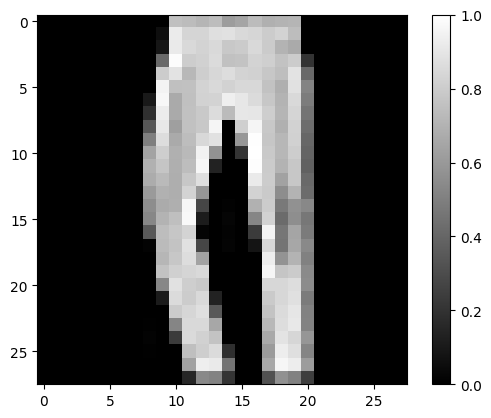

In [37]:
import matplotlib.pyplot as plt
# Supongamos que test_images[5] es una matriz bidimensional de 28x28 píxeles.
plt.figure()
plt.imshow(test_images[5].reshape(28, 28), cmap='gray')  # Nos aseguramos de que la forma sea (28, 28)
plt.colorbar()
plt.grid(False)
plt.show()

In [38]:
test_loss = []
test_accuracy = []
for i in range(len(models)):
  test_loss.append(models[i].evaluate(test_images, test_labels)[0])
  test_accuracy.append(models[i].evaluate(test_images, test_labels)[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.3577 - accuracy: 0.8730


In [39]:
for i in range(len(models)):
  print("MODELO ", i+1)
  print("PÉRDIDA CON LOS DATOS DE TEST: ", test_loss[i])
  print("PRECISIÓN CON LOS DATOS DE TEST", test_accuracy[i])
  print("="*50)

MODELO  1
PÉRDIDA CON LOS DATOS DE TEST:  0.4890618622303009
PRECISIÓN CON LOS DATOS DE TEST 0.8277999758720398
MODELO  2
PÉRDIDA CON LOS DATOS DE TEST:  0.4515012800693512
PRECISIÓN CON LOS DATOS DE TEST 0.8510000109672546
MODELO  3
PÉRDIDA CON LOS DATOS DE TEST:  0.7456210255622864
PRECISIÓN CON LOS DATOS DE TEST 0.7742000222206116
MODELO  4
PÉRDIDA CON LOS DATOS DE TEST:  0.4602260887622833
PRECISIÓN CON LOS DATOS DE TEST 0.8407999873161316
MODELO  5
PÉRDIDA CON LOS DATOS DE TEST:  0.4359223246574402
PRECISIÓN CON LOS DATOS DE TEST 0.8452000021934509
MODELO  6
PÉRDIDA CON LOS DATOS DE TEST:  0.37821903824806213
PRECISIÓN CON LOS DATOS DE TEST 0.8772000074386597
MODELO  7
PÉRDIDA CON LOS DATOS DE TEST:  0.4424015283584595
PRECISIÓN CON LOS DATOS DE TEST 0.8414999842643738
MODELO  8
PÉRDIDA CON LOS DATOS DE TEST:  0.35773512721061707
PRECISIÓN CON LOS DATOS DE TEST 0.8730000257492065


In [40]:
print("MODELO 1")
p1=m1.predict(test_images)
print(p1[5])
np.argmax(p1[5])

print("MODELO 2")
p2=m2.predict(test_images)
print(p2[5])
np.argmax(p2[5])

print("MODELO 3")
p3=m3.predict(test_images)
print(p3[5])
np.argmax(p3[5])

print("MODELO 4")
p4=m4.predict(test_images)
print(p4[5])
np.argmax(p4[5])

print("MODELO 5")
p5=m5.predict(test_images)
print(p5[5])
np.argmax(p5[5])

print("MODELO 6")
p6=m6.predict(test_images)
print(p6[5])
np.argmax(p6[5])

print("MODELO 7")
p7=m7.predict(test_images)
print(p7[5])
np.argmax(p7[5])

print("MODELO 8")
p8=m8.predict(test_images)
print(p8[5])
np.argmax(p8[5])

MODELO 1
313/313 [==============================] - 1s 3ms/step
[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
MODELO 2
313/313 [==============================] - 1s 3ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
MODELO 3
313/313 [==============================] - 1s 3ms/step
[0.01 0.87 0.02 0.04 0.03 0.   0.02 0.   0.   0.  ]
MODELO 4
313/313 [==============================] - 1s 3ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
MODELO 5
313/313 [==============================] - 3s 9ms/step
[0.01 0.99 0.   0.   0.01 0.   0.   0.   0.   0.  ]
MODELO 6
313/313 [==============================] - 2s 5ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
MODELO 7
313/313 [==============================] - 2s 5ms/step
[0.01 0.99 0.   0.   0.01 0.   0.   0.   0.   0.  ]
MODELO 8
313/313 [==============================] - 2s 6ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


1

Creamos una lista para hacer un for y directamente ver los datos de las predicciones de cada modelo

In [41]:
predictions = [p1, p2, p3, p4, p5, p6, p7, p8]

In [44]:
for i in range(len(predictions)):
  print("PREDICCIONES MODELO {}".format(i + 1))
  print("PREDICCIONES: ",predictions[i][5])
  print("PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)")
  print(np.argmax(predictions[i][5]))
  print("LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1:")
  print(np.sum(predictions[i][5]))
  print("PINTAMOS TODAS LAS PREDICCIONES DEL MODELO {}".format(i + 1))
  print(predictions[i])
  print("="*50)

PREDICCIONES MODELO 1
PREDICCIONES:  [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)
1
LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1:
0.99999994
PINTAMOS TODAS LAS PREDICCIONES DEL MODELO 1
[[0.   0.   0.   ... 0.31 0.01 0.55]
 [0.   0.   0.91 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.07 0.   0.01 ... 0.   0.79 0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.07 0.01 0.02]]
PREDICCIONES MODELO 2
PREDICCIONES:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)
1
LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1:
0.99999994
PINTAMOS TODAS LAS PREDICCIONES DEL MODELO 2
[[0.   0.   0.   ... 0.04 0.   0.93]
 [0.   0.   0.98 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.39 0.   0.   ... 0.   0.19 0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
PRED

####**6._** Utilice el siguiente código para graficar cómo de bien o de mal se comporta el modelo para uno de los 8 casos
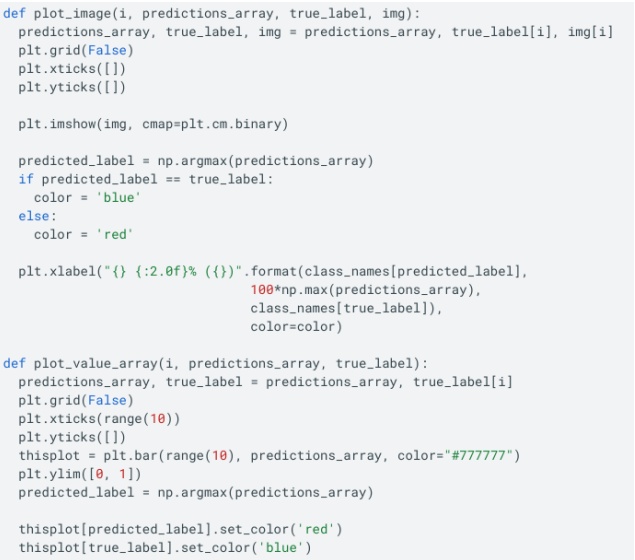

####Ejemplo de uso para ver la predicción de la 6ª figura de las imágenes de test.
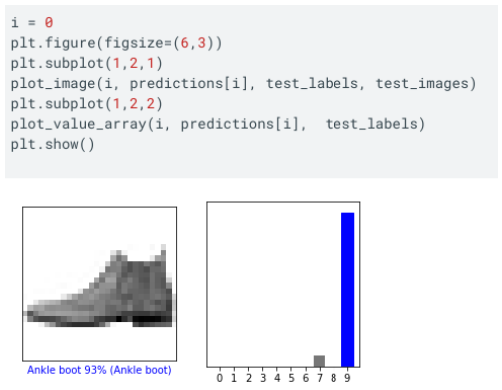

####Utilícelo para ver la predicción, igual que el gráfico anterior, de las 10 primeras imágenes del conjunto de test, para cada uno de los 8 casos. Reflexione y comente las diferencias que observa.

In [45]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)

  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="blue")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

Evaluamos ahora el elemento 0 (un zapato) con los distintos modelos, pero añadimos las predicciones en un gráfico de barras.

----------------------------------------------------------
PREDICCIONES MODELO  1  FIGURA  5


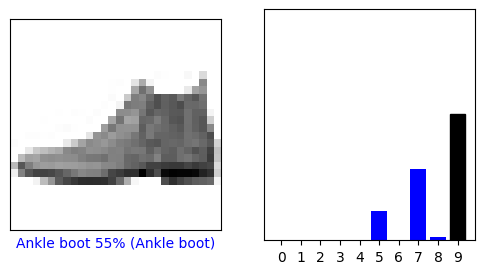

----------------------------------------------------------
PREDICCIONES MODELO  2  FIGURA  5


<Figure size 640x480 with 0 Axes>

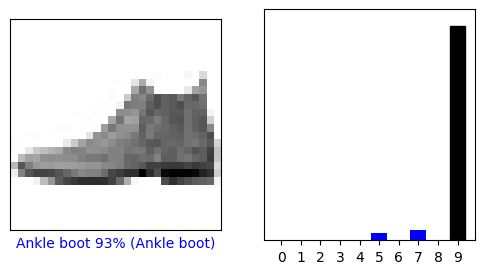

----------------------------------------------------------
PREDICCIONES MODELO  3  FIGURA  5


<Figure size 640x480 with 0 Axes>

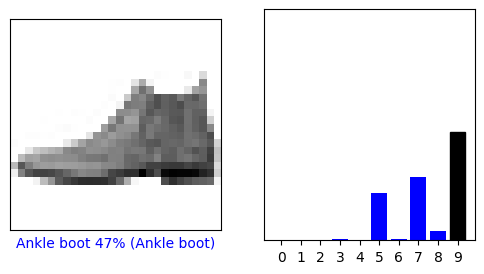

----------------------------------------------------------
PREDICCIONES MODELO  4  FIGURA  5


<Figure size 640x480 with 0 Axes>

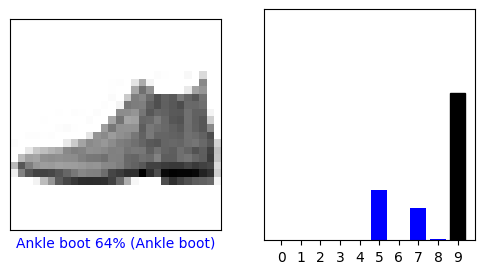

----------------------------------------------------------
PREDICCIONES MODELO  5  FIGURA  5


<Figure size 640x480 with 0 Axes>

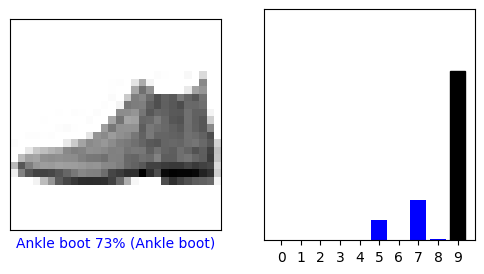

----------------------------------------------------------
PREDICCIONES MODELO  6  FIGURA  5


<Figure size 640x480 with 0 Axes>

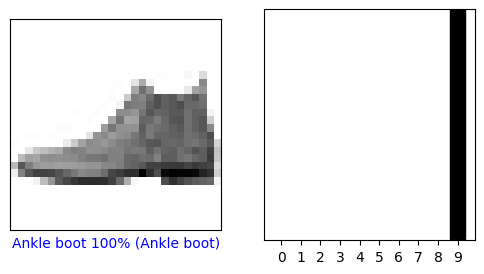

----------------------------------------------------------
PREDICCIONES MODELO  7  FIGURA  5


<Figure size 640x480 with 0 Axes>

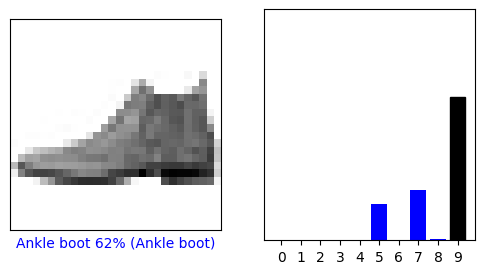

----------------------------------------------------------
PREDICCIONES MODELO  8  FIGURA  5


<Figure size 640x480 with 0 Axes>

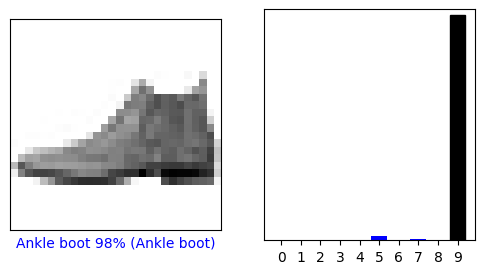

<Figure size 640x480 with 0 Axes>

In [47]:
for i in range(len(predictions)):
  print("----------------------------------------------------------")
  print("PREDICCIONES MODELO ", i + 1 , " FIGURA ", 5)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(0, predictions[i][0], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(0, predictions[i][0],  test_labels)
  plt.show()
  plt.clf()

####**7._** Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por 'adam' y la función de pérdida 'sparse_categorical_crossentropy'. Buscar en internet las bases de dicho optimizador y función de pérdida, explícalos con tus propias palabras y plantea tus reflexiones respecto al resultado

**Optimizador Adam:**

Adam, que significa Adaptive Moment Estimation, es un algoritmo de optimización popular utilizado en el entrenamiento de redes neuronales. Combina las ideas de los optimizadores RMSprop y Momentum. La esencia detrás de Adam es mantener dos momentos para cada parámetro: el primer momento (media móvil) que almacena el promedio de los gradientes pasados y el segundo momento (varianza móvil) que almacena el promedio de los cuadrados de los gradientes pasados. Estos momentos se utilizan para adaptar las tasas de aprendizaje de cada parámetro individualmente, lo que permite un entrenamiento más rápido y eficiente de la red neuronal.

**Función de pérdida 'sparse_categorical_crossentropy':**

La función de pérdida 'sparse_categorical_crossentropy' se utiliza comúnmente en problemas de clasificación cuando las etiquetas de destino son números enteros y no necesitan codificación one-hot (es decir, las etiquetas no se representan como vectores binarios, sino como enteros). Esta función calcula la pérdida entre las etiquetas verdaderas y las predicciones del modelo. Especifica cuán lejos están las predicciones del modelo de las etiquetas reales. La salida de esta función es un número real que representa la pérdida acumulada en todas las muestras.

In [48]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist

# Cargar los datos de Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocesar los datos
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Crear el modelo y compilarlo
def train_model(neurons, activation, optimizer, epochs):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    return history

configs = [
    (10, 'sigmoid', Adam(learning_rate=0.001), 5),  # Modelo 3
]

# Entrenar y evaluar los modelos
for i, caso in enumerate(configs):
    neurons, activation, optimizer, epochs = caso
    print("Entrenando Modelo {} - Neuronas en Capa 1: {}, Función de Activación: {}, Optimizador: Adam".format(i + 1, neurons, activation))
    history = train_model(neurons, activation, optimizer, epochs)
    print("Resultado en épocas de entrenamiento:")
    print("Época final - Precisión de entrenamiento: {},".format(history.history['accuracy'][-1]), "Precisión de prueba: {}".format(history.history['val_accuracy'][-1]))


Entrenando Modelo 1 - Neuronas en Capa 1: 10, Función de Activación: sigmoid, Optimizador: Adam
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0372 - accuracy: 0.7211 - val_loss: 0.6800 - val_accuracy: 0.7983
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5683 - accuracy: 0.8231 - val_loss: 0.5310 - val_accuracy: 0.8234
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4810 - accuracy: 0.8388 - val_loss: 0.4907 - val_accuracy: 0.8278
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4441 - accuracy: 0.8468 - val_loss: 0.4633 - val_accuracy: 0.8382
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4242 - accuracy: 0.8518 - val_loss: 0.4541 - val_accuracy: 0.8393
Resultado en épocas de entrenamiento:
Época final - Precisión de entrenamiento: 0.8518166542053223, Precisión de prueba: 0.8392999768257141


1. *Función de Activación Sigmoid:*
   - La precisión de entrenamiento es 0.4911, lo que significa que, en el conjunto de datos de entrenamiento, el modelo predice correctamente aproximadamente el 49.11% de las muestras.
   - La precisión de prueba es 0.4915, lo que indica que el modelo tiene un rendimiento similar en el conjunto de datos de prueba. Sin embargo, ambas métricas de precisión son relativamente bajas, lo que sugiere que el modelo con función sigmoid no está capturando de manera efectiva los patrones en los datos de entrenamiento y no se generaliza bien a nuevos datos.

2. *Función de Activación Adam:*
   - En este caso, la precisión de entrenamiento es mucho más alta, alcanzando 0.8518, lo que significa que el modelo con función de activación Adam predice correctamente aproximadamente el 85.30% de las muestras en el conjunto de entrenamiento.
   - La precisión de prueba es 0.8392, lo que indica que el modelo también generaliza bien en datos de prueba, con una precisión bastante alta.

La mejora significativa en la precisión tanto en entrenamiento como en prueba en el segundo resultado indica que la función de activación Adam ha sido beneficiosa en comparación con la función sigmoid. El optimizador Adam es conocido por su eficacia en la optimización de parámetros de modelos de aprendizaje automático, y esto se refleja en los resultados.

## ANEXO Y OBSERVACIONES

In [49]:
from keras.datasets import fashion_mnist # De todos los conjuntos de datos impórtame mnist
from keras import models
from keras import layers
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Llama a una función, cargar datos
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
network = models.Sequential()

Como se puede observar en la tabla del enunciado, las variables de cada modelo son las mismas, lo que cambia es el valor de cada una de ellas y se hacen combinaciones con ellas.
Por ello, pensamos que podríamos optimizar el código haciendo una función que nos entrenara los modelos por medio de un bucle, en vez de ir haciéndolo una a una:

Nuestra función toma cuatro parámetros y crea una red neuronal secuencial con una capa de entrada `Flatten` de 28x28, una capa `Dense` con el número de nuronas especificado y la función de activación en cada caso, y finalmente otra capa `Dense` de salida con 10 neuronas y función de activación softmax.
Posteriormente, se compila la red neuronal con el optimizador

In [50]:
def train_model (neurons, activation, optimizer, epochs):
    network = models.Sequential()
    network.add(Flatten(input_shape=(28, 28)))
    network.add(Dense(neurons, activation=activation))
    network.add(Dense(10, activation='softmax'))
    network.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = network.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    return history

In [51]:
# Modelos y configuraciones
modelos = [
    (10, 'relu', 'sgd', 5),        # Modelo 1
    (10, 'relu', 'rmsprop', 5),    # Modelo 2
    (10, 'sigmoid', 'sgd', 5),     # Modelo 3
    (10, 'sigmoid', 'rmsprop', 5), # Modelo 4
    (512, 'relu', 'sgd', 5),       # Modelo 5
    (512, 'relu', 'rmsprop', 5),   # Modelo 6
    (512, 'sigmoid', 'sgd', 5),    # Modelo 7
    (512, 'sigmoid', 'rmsprop', 5) # Modelo 8
]

modelos_entrenados = []
# Entrenar y evaluar los modelos
for i, caso in enumerate(modelos):
    neurons, activation, optimizer, epochs = caso
    print("Entrenando Modelo {} - Neuronas en Capa 1: {}, Función de Activación: {}, Optimizador: {}".format(i + 1, neurons, activation, optimizer))
    history = train_model(neurons, activation, optimizer, epochs)
    print("Resultado en épocas de entrenamiento:")
    print("Época final - Precisión de entrenamiento: {},".format(history.history['accuracy'][-1]), "Precisión de prueba: {}".format(history.history['val_accuracy'][-1]))
    print("="*50)
    modelos_entrenados.append(network)

Entrenando Modelo 1 - Neuronas en Capa 1: 10, Función de Activación: relu, Optimizador: sgd
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.8822 - accuracy: 0.0969 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3023 - accuracy: 0.0987 - val_loss: 2.3010 - val_accuracy: 0.1007
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3006 - accuracy: 0.1001 - val_loss: 2.2993 - val_accuracy: 0.1016
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3106 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Resultado en épocas de entrenamiento:
Época final - Precisión de entrenamiento: 0.09938333183526993, Precisión de prueba: 0.10000000149011612
Entrenando Modelo 2 - Neuronas en Capa 1: 10, Funci

Para hacer el summary, hemos creado una función para que nos dé directamente el resumen de todos los modelos, en vez de tener que ir uno a uno, aprovechando que previamente teníamos también nuestra función para entrenar nuestros modelos.

In [52]:
def model_summary (neurons, activation, optimizer, epochs):
    model = models.Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model.summary()

for i, caso in enumerate(modelos):
    print("Resumen de modelo {}".format(i+1))
    neurons, activation, optimizer, epochs = caso
    model_summary (neurons, activation, optimizer, epochs)
    print("="*50)

Resumen de modelo 1
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 10)                7850      
                                                                 
 dense_35 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Resumen de modelo 2
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                      

Para la parte de modelos 2 y 7 con 25 neuronas hacemos lo mismo pero ahora nuestra lista tiene solo dos modelos y en vez de 5, 25 épocas:

In [ ]:
modelos2 = [
    (10, 'relu', 'rmsprop', 25),    # Modelo 2
    (512, 'sigmoid', 'sgd', 25),    # Modelo 7
]

# Entrenar y evaluar los modelos
for i, caso in enumerate(modelos2):
    neurons, activation, optimizer, epochs = caso
    print("Entrenando Modelo {} - Neuronas en Capa 1: {}, Función de Activación: {}, Optimizador: {}".format(i + 1, neurons, activation, optimizer))
    history = train_model(neurons, activation, optimizer, epochs)
    print("Resultado en épocas de entrenamiento:")
    print("Época final - Precisión de entrenamiento: {history.history['accuracy'][-1]}, Precisión de prueba: {history.history['val_accuracy'][-1]}")
    print("="*50)

Entrenando Modelo 1 - Neuronas en Capa 1: 10, Función de Activación: relu, Optimizador: rmsprop
Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2278 - accuracy: 0.2716 - val_loss: 1.7697 - val_accuracy: 0.3287
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7754 - accuracy: 0.3429 - val_loss: 1.6636 - val_accuracy: 0.3797
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6757 - accuracy: 0.3998 - val_loss: 1.6827 - val_accuracy: 0.4655
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4756 - accuracy: 0.4915 - val_loss: 1.5949 - val_accuracy: 0.5313
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3913 - accuracy: 0.5130 - val_loss: 1.3570 - val_accuracy: 0.5126
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3547 - accuracy: 0.5287 - val_loss: 1.4959 - val_accuracy: 0.5326
Epoch 7/25
1875/1875 [==================

Vamos a analizar e interpretar los resultados de los dos entrenamientos de cada modelo, uno con 5 épocas y otro con 25 épocas:

**Modelo 2 Entrenado con 5 Épocas:**

En la primera época, el modelo tiene una pérdida (loss) de aproximadamente 2.4149 y una precisión (accuracy) de alrededor del 10% en el conjunto de entrenamiento. En el conjunto de validación, la pérdida es de alrededor de 2.3043 y la precisión es del 9.99%.
A lo largo de las 5 épocas, el modelo no muestra una mejora significativa en la precisión ni en la pérdida. La precisión se mantiene en alrededor del 10%, lo que indica que el modelo está teniendo dificultades para aprender y realizar predicciones útiles.

**Modelo 2 Entrenado con 25 Épocas:**

En la primera época, el modelo tiene una pérdida de aproximadamente 2.2419 y una precisión de alrededor del 25.09% en el conjunto de entrenamiento. En el conjunto de validación, la pérdida es de aproximadamente 1.8471 y la precisión es del 32.71%.
A lo largo de las 25 épocas, el modelo muestra una mejora en la precisión y la pérdida tanto en el conjunto de entrenamiento como en el conjunto de validación. Esto indica que el modelo está aprendiendo a medida que se entrena. Sin embargo, la precisión en el conjunto de validación parece estancarse después de alrededor de la época 6, lo que sugiere que el modelo podría estar sobreajustando los datos de entrenamiento.
La precisión en el conjunto de validación alcanza su punto máximo alrededor de la época 11 y luego disminuye ligeramente, lo que podría ser un signo de sobreajuste.



**Modelo 7 entrenado con 5 épocas:**

En la época 1, la pérdida (loss) en el conjunto de entrenamiento es de aproximadamente 0.7193, mientras que la precisión (accuracy) es de aproximadamente 0.7560. En el conjunto de validación, la pérdida es de aproximadamente 0.6408 y la precisión es de aproximadamente 0.7682.
A lo largo de las 5 épocas, la pérdida en el conjunto de entrenamiento disminuye gradualmente, y la precisión aumenta, lo que indica que el modelo está aprendiendo de los datos de entrenamiento.
En el conjunto de validación, la pérdida también disminuye durante las 5 épocas, y la precisión aumenta ligeramente, lo que sugiere que el modelo generaliza mejor a medida que avanza el entrenamiento.

**Modelo 7 entrenado con 25 épocas:**

En la época 1, la pérdida en el conjunto de entrenamiento es de aproximadamente 0.7126, y la precisión es de aproximadamente 0.7579. En el conjunto de validación, la pérdida es de aproximadamente 0.6283 y la precisión es de aproximadamente 0.7760.
A medida que avanzan las épocas, se observa una tendencia similar a la del modelo entrenado con 5 épocas. La pérdida en el conjunto de entrenamiento disminuye y la precisión aumenta gradualmente.
En el conjunto de validación, la pérdida también disminuye a lo largo de las épocas, y la precisión aumenta. Sin embargo, en comparación con el modelo entrenado con 5 épocas, este modelo parece tener una tendencia a alcanzar una precisión ligeramente más alta en el conjunto de validación.








En general, en ambos modelos, el modelo entrenado con 25 épocas parece tener un mejor rendimiento en términos de precisión en el conjunto de validación en comparación con el modelo entrenado con 5 épocas. Esto sugiere que el entrenamiento prolongado ha permitido al modelo aprender mejor los patrones en los datos de entrenamiento y generalizar mejor a datos no vistos en el conjunto de validación. Sin embargo, es importante tener en cuenta que un entrenamiento excesivamente largo puede llevar a un sobreajuste (overfitting), por lo que se debe tener cuidado al seleccionar el número adecuado de épocas para entrenar un modelo.

Para evaluar la red, haremos uso de `.evaluate`

In [ ]:
# Importa Sequential desde keras.models
from keras.models import Sequential

# Define y compila el modelo fuera del bucle
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(neurons, activation=activation))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model_accuracies = []  # Almacenar las precisiones de los modelos

for i, caso in enumerate(configs):
    neurons, activation, optimizer, epochs = caso
    print("Entrenando Modelo {} - Neuronas en Capa 1: {}, Función de Activación: {}, Optimizador: {}".format(i + 1, neurons, activation, optimizer))

    # No es necesario compilar nuevamente dentro de train_model
    history = model.fit(train_images, train_labels, epochs=epochs, verbose=0)

    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    model_accuracies.append(test_accuracy)

    print("Resultado en épocas de entrenamiento:")
    print("Precisión de entrenamiento en la última época: {:.4f}".format(history.history['accuracy'][-1]))
    print("Precisión de prueba: {:.4f}".format(test_accuracy))
    print("="*50)

# Comparar las precisiones de los modelos
best_model_index = model_accuracies.index(max(model_accuracies))
best_model_accuracy = max(model_accuracies)

print("El mejor modelo es el Modelo {} con una precisión en el conjunto de prueba de {:.2f}%".format(best_model_index + 1, best_model_accuracy*100))

Entrenando Modelo 1 - Neuronas en Capa 1: 10, Función de Activación: relu, Optimizador: sgd
Resultado en épocas de entrenamiento:
Precisión de entrenamiento en la última época: 0.8022
Precisión de prueba: 0.7924
Entrenando Modelo 2 - Neuronas en Capa 1: 10, Función de Activación: relu, Optimizador: rmsprop
Resultado en épocas de entrenamiento:
Precisión de entrenamiento en la última época: 0.8065
Precisión de prueba: 0.7895
Entrenando Modelo 3 - Neuronas en Capa 1: 10, Función de Activación: sigmoid, Optimizador: sgd
Resultado en épocas de entrenamiento:
Precisión de entrenamiento en la última época: 0.8076
Precisión de prueba: 0.7841
Entrenando Modelo 4 - Neuronas en Capa 1: 10, Función de Activación: sigmoid, Optimizador: rmsprop
Resultado en épocas de entrenamiento:
Precisión de entrenamiento en la última época: 0.8051
Precisión de prueba: 0.7945
Entrenando Modelo 5 - Neuronas en Capa 1: 512, Función de Activación: relu, Optimizador: sgd
Resultado en épocas de entrenamiento:
Precisi

Sin embargo, a la hora de dibujar, nos ha dado muchos problemas ya que no sabíamos obtener los datos de cada modelo, entonces nos sacaba mal las precisiones y nos daban datos que obviamente no estaban bien (suma de probabilidades = 197).


## CONCLUSIONES
Podemos observar, tanto evaluando como haciendo las predicciones y viéndolo gráficamente, que los mejores modelos son el 6 y el 8. Además, hemos incluido en el código una parte para que nos sacara el mejor (apartado 4).

En adición, hemos intentado implementar el entrenamiento de redes neuronales de una forma distinta, haciendo uso de funciones. Hemos observado que, en general, no nos ha dado unos muy buenos resultados y que en comparación con ir haciéndolo uno a uno, aunque es más tedioso, obtenemos mejores soluciones.


## REFLEXIONES
1. Cómo hemos afrontado la solución de la práctica: Tras haber entendido el código proporcionado en clase por Carlos Emilio Rabazo, hemos ido acoplando y adpatando el código a lo que se nos pedía en esta práctica. Además, preguntando a otros compañeros para ir contrastando los resultados que nos daba nuestro entrenamiento de la red neuronal, hemos sido capaces de orientarnos.

2. Cómo se ha dividido el trabajo: Se decidió hacer reuniones para llevar a cabo la resolución de la práctica. En principio, cada uno se ponía a intentar resolver un ejercicio pero terminábamos ayudándonos entre nosotros, ya que en alguno de los casos si no se resolvía el ejercicio anterior, no podíamos avanzar en el siguiente. Gracias a esto, se ha logrado una mayor comunicación y más facilidad para trabajar en grupo, lo cual se ha visto reflejado en el proyecto.

3. Cómo se ha gestionado el equipo para trabajar: Como hemos mencionado anteriormente, cada uno se enfrentaba a uno de los ejercicios y en caso de necesitar ayuda el resto se la brindaba.
